### DataFrame of Bars with Alcohol

The following JupyterPy Notebook  is made for tha analysis of the dataset containing multiple datas of the bar, and also the other containers
##### The major containers to look are the :
1. Purchase (ml)
2. Consumed (ml)
3. Closing Balance (ml)
4. also a notable refernce should be taken as to the respective Bars, Alcohol Varities and their types, contribution to the Closing (ml)

##### Libraries used for the PyNotebook are :
1. Pandas (for Database Reading as well as Database manipulation)
2. Plotly (for create intuitive plots for better data analysis and understanding)
3. Matplotlib (for visualisation of plots)
4. NumPy (for array creation (if needed))

The dataset can be accessed from the following link - https://docs.google.com/spreadsheets/d/14i7oWnBOoIf3pai37bsGYkby3VXJL1AlX_KxC8ZMKtg/edit?gid=1742513311#gid=1742513311
but has been downloaded here for personal reference and sufficient data analysis.

Demo Video Link - https://drive.google.com/file/d/1GKy_7SNiD3tB3LrshB_Fz_zRjQ6Cu83o/view?usp=sharing


##### Below cell for importing and reading of given dataset

In [24]:
import matplotlib.pyplot as plt
import numpy as np, pandas as pd, matplotlib, plotly.express as px
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['font.size'] = 16 #Parameters for graphs
matplotlib.rcParams['figure.figsize'] = (20,10) #Parameters for graphs
df = pd.read_csv('https://raw.githubusercontent.com/SoultySprings/PyProjects/master/kristalball/consdata.csv') #Reading dataset


In [25]:
print(df) #Printing Dataset for understanding
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n",df.describe()) #Check for outliers or null-data
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++\n",df.info()) #Check for space

     Date Time Served        Bar Name Alcohol Type      Brand Name  \
0      1/1/2023 19:35     Smith's Bar          Rum  Captain Morgan   
1      1/1/2023 10:07     Smith's Bar         Wine     Yellow Tail   
2      1/1/2023 11:26   Johnson's Bar        Vodka      Grey Goose   
3      1/1/2023 13:53   Johnson's Bar         Beer           Coors   
4      1/1/2023 22:28   Johnson's Bar         Wine     Yellow Tail   
...               ...             ...          ...             ...   
6570   1/1/2024 21:03  Anderson's Bar         Beer           Coors   
6571   1/1/2024 21:15  Anderson's Bar          Rum          Malibu   
6572   1/1/2024 18:34  Anderson's Bar      Whiskey    Jack Daniels   
6573   1/1/2024 22:46    Thomas's Bar        Vodka         Absolut   
6574   1/1/2024 21:26    Thomas's Bar          Rum         Bacardi   

      Opening Balance (ml)  Purchase (ml)  Consumed (ml)  Closing Balance (ml)  
0             2.555040e+03        1824.84           0.00               4379.88

#### Detection of Unique Items such as the unique bar names, alcohols consumed and their brands that are taken :

In [26]:

uniqueBars = df['Bar Name'].unique()
uniqueAlcohols = df['Alcohol Type'].unique()
uniqueBrandName = df['Brand Name'].unique()
print(uniqueBars)
print("\n", uniqueAlcohols)
print("\n", uniqueBrandName)


["Smith's Bar" "Johnson's Bar" "Brown's Bar" "Taylor's Bar"
 "Anderson's Bar" "Thomas's Bar"]

 ['Rum' 'Wine' 'Vodka' 'Beer' 'Whiskey']

 ['Captain Morgan' 'Yellow Tail' 'Grey Goose' 'Coors' 'Jim Beam' 'Absolut'
 'Jack Daniels' 'Sutter Home' 'Miller' 'Bacardi' 'Malibu' 'Jameson'
 'Smirnoff' 'Budweiser' 'Heineken' 'Barefoot']


#### The following cell differentiates the date as well as the time in hrs and mins to analyze the data with respect to time in order to find any trends, such as higher consumption at one time while lower at the other

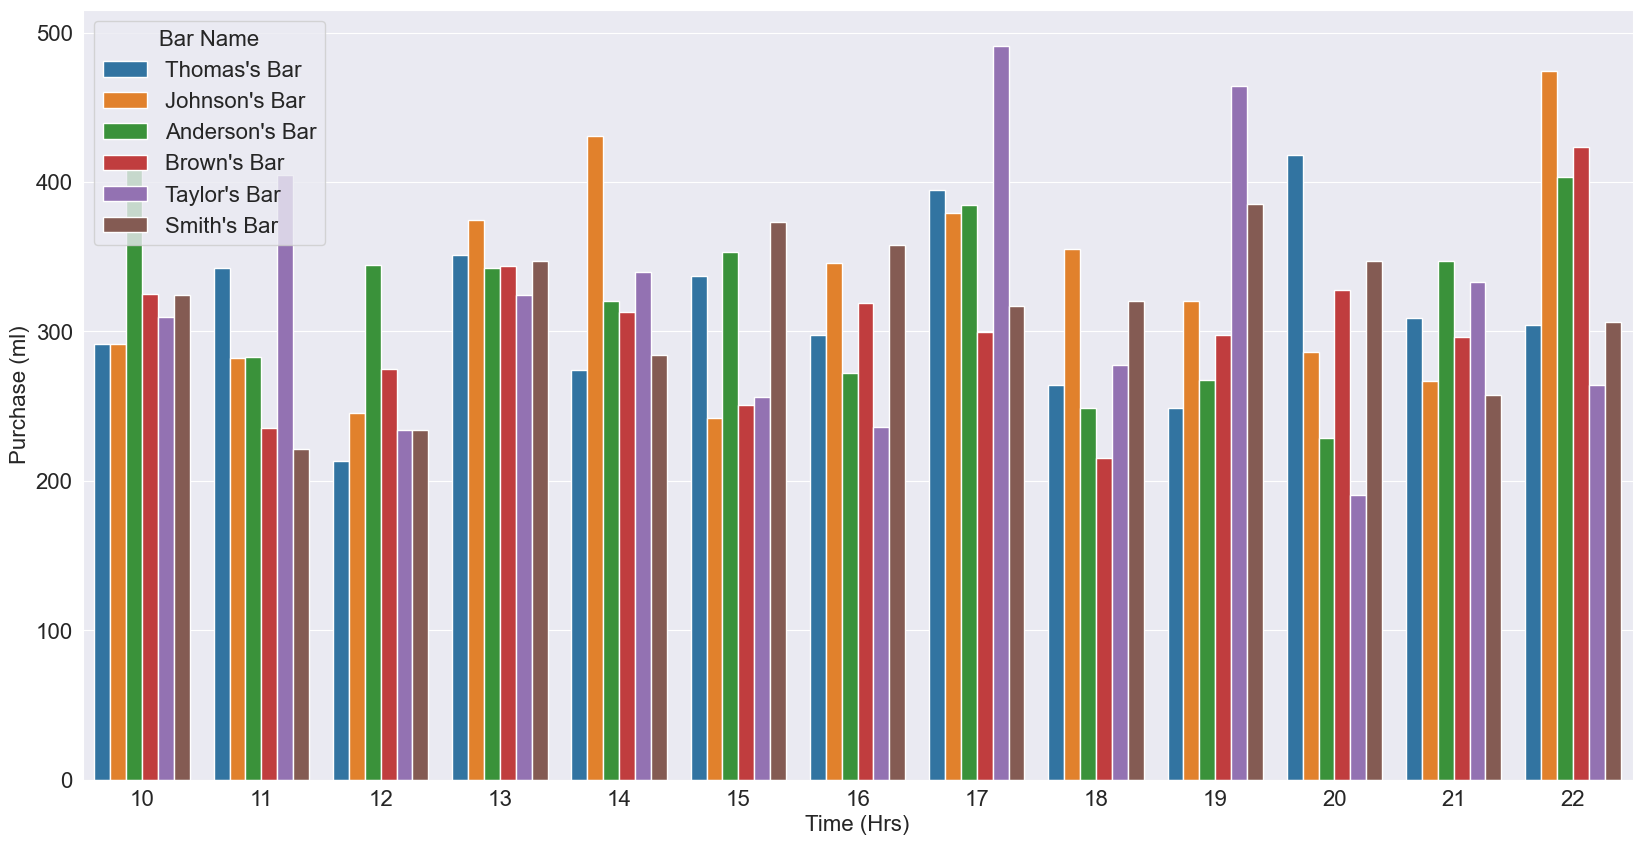

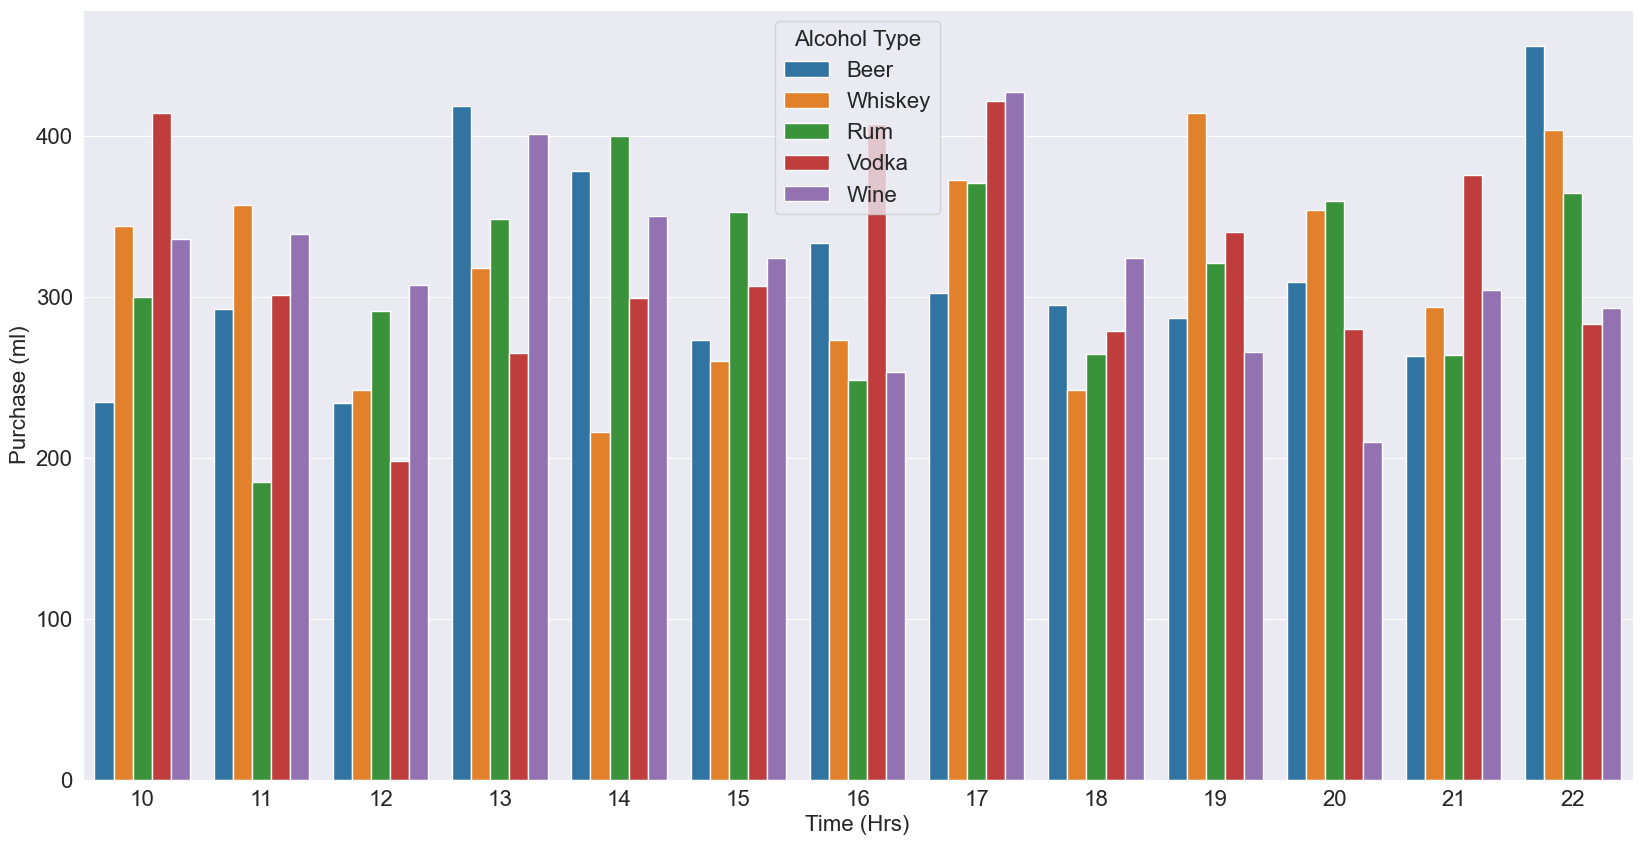

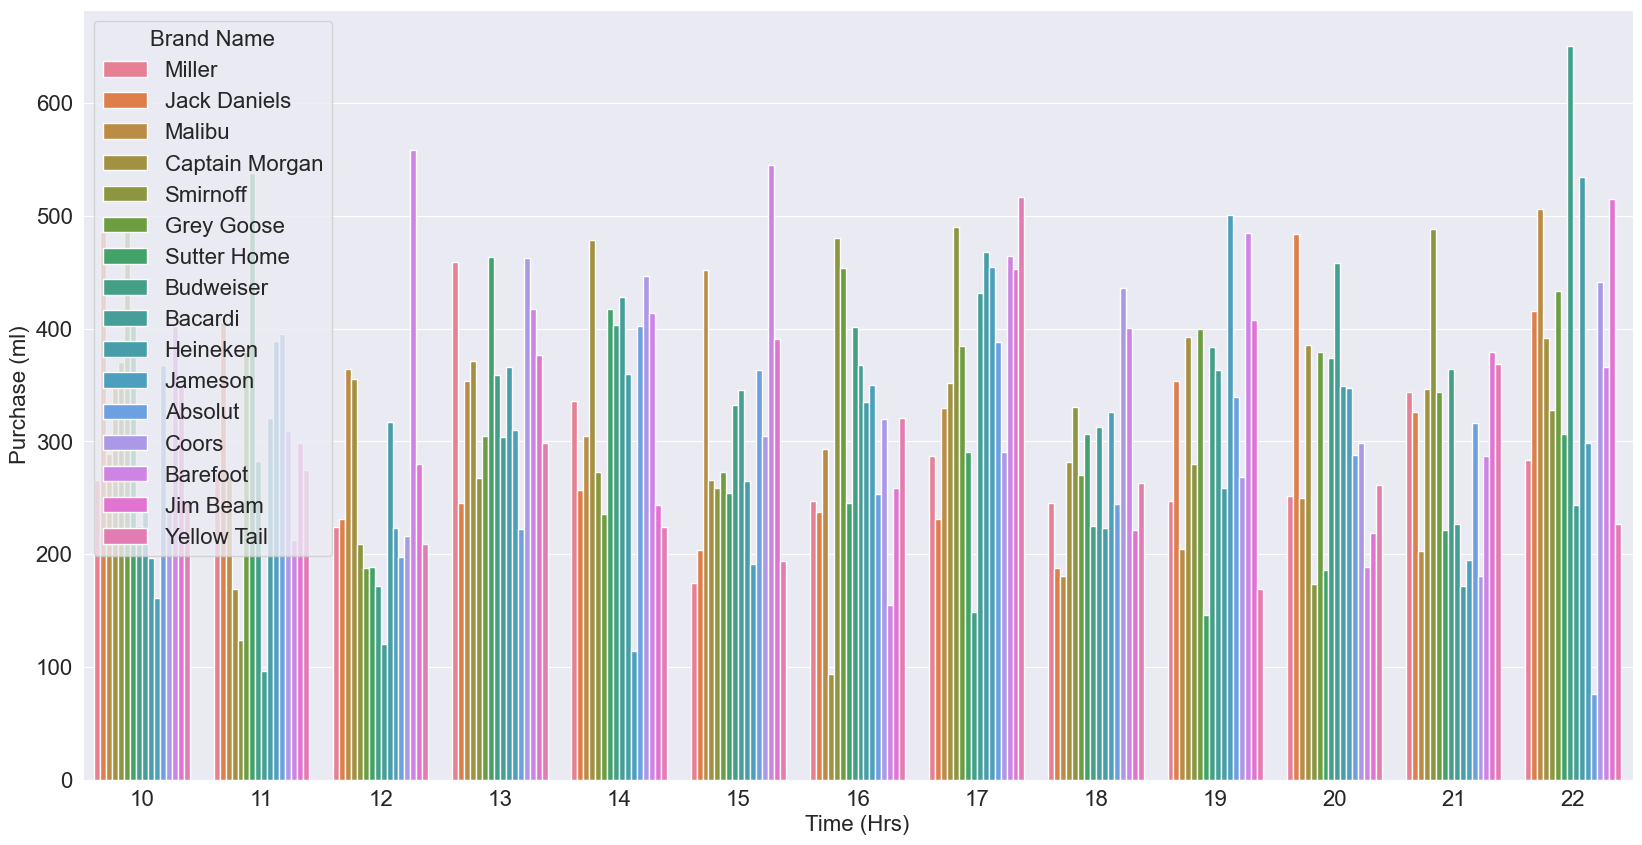

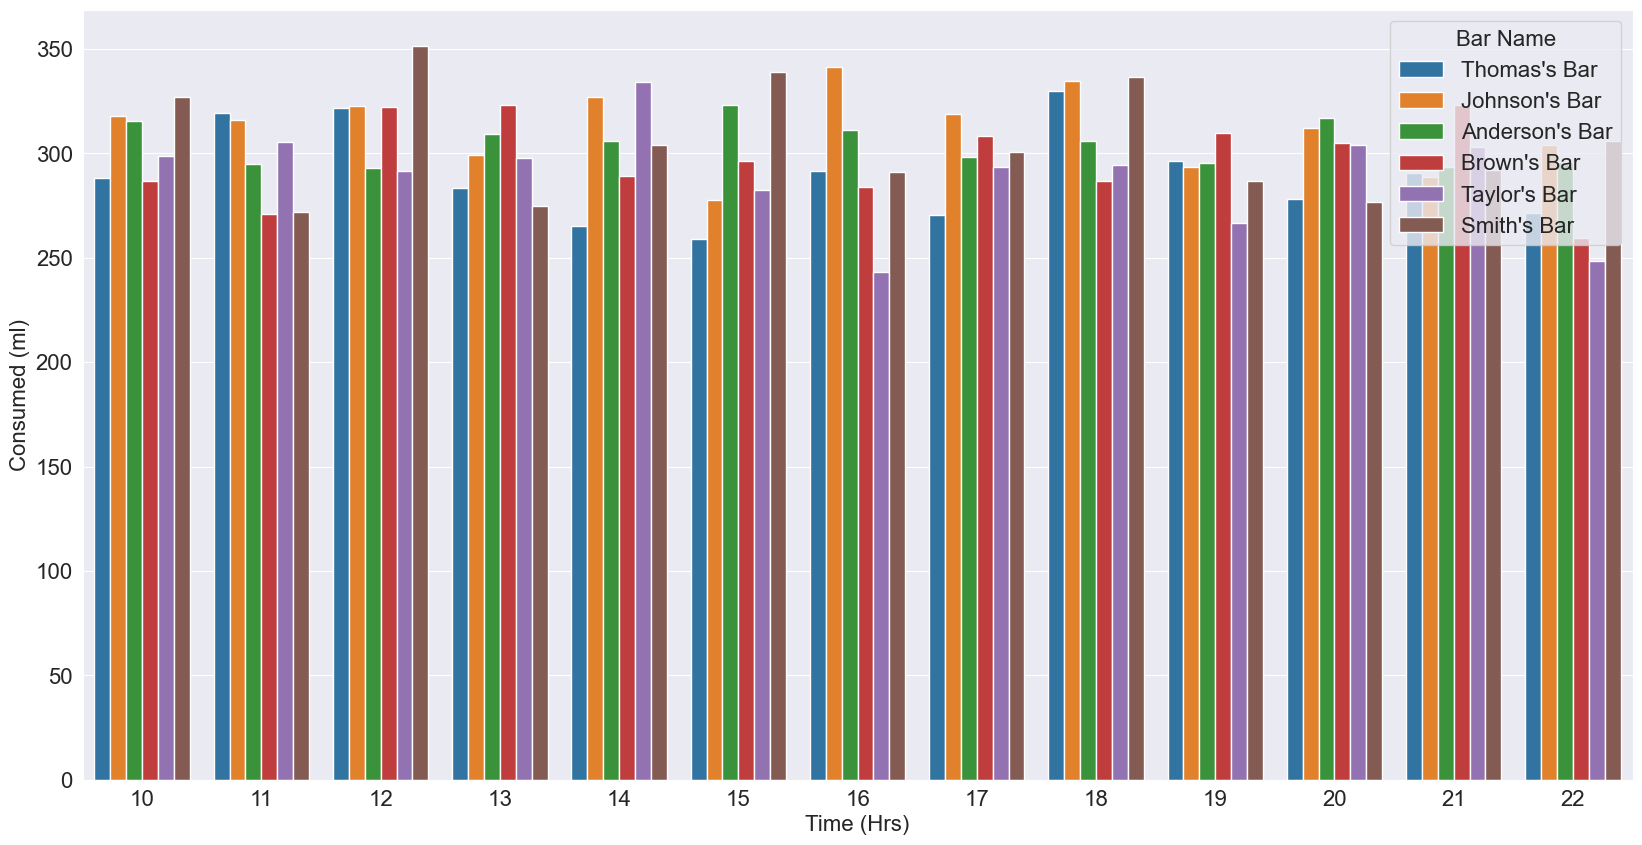

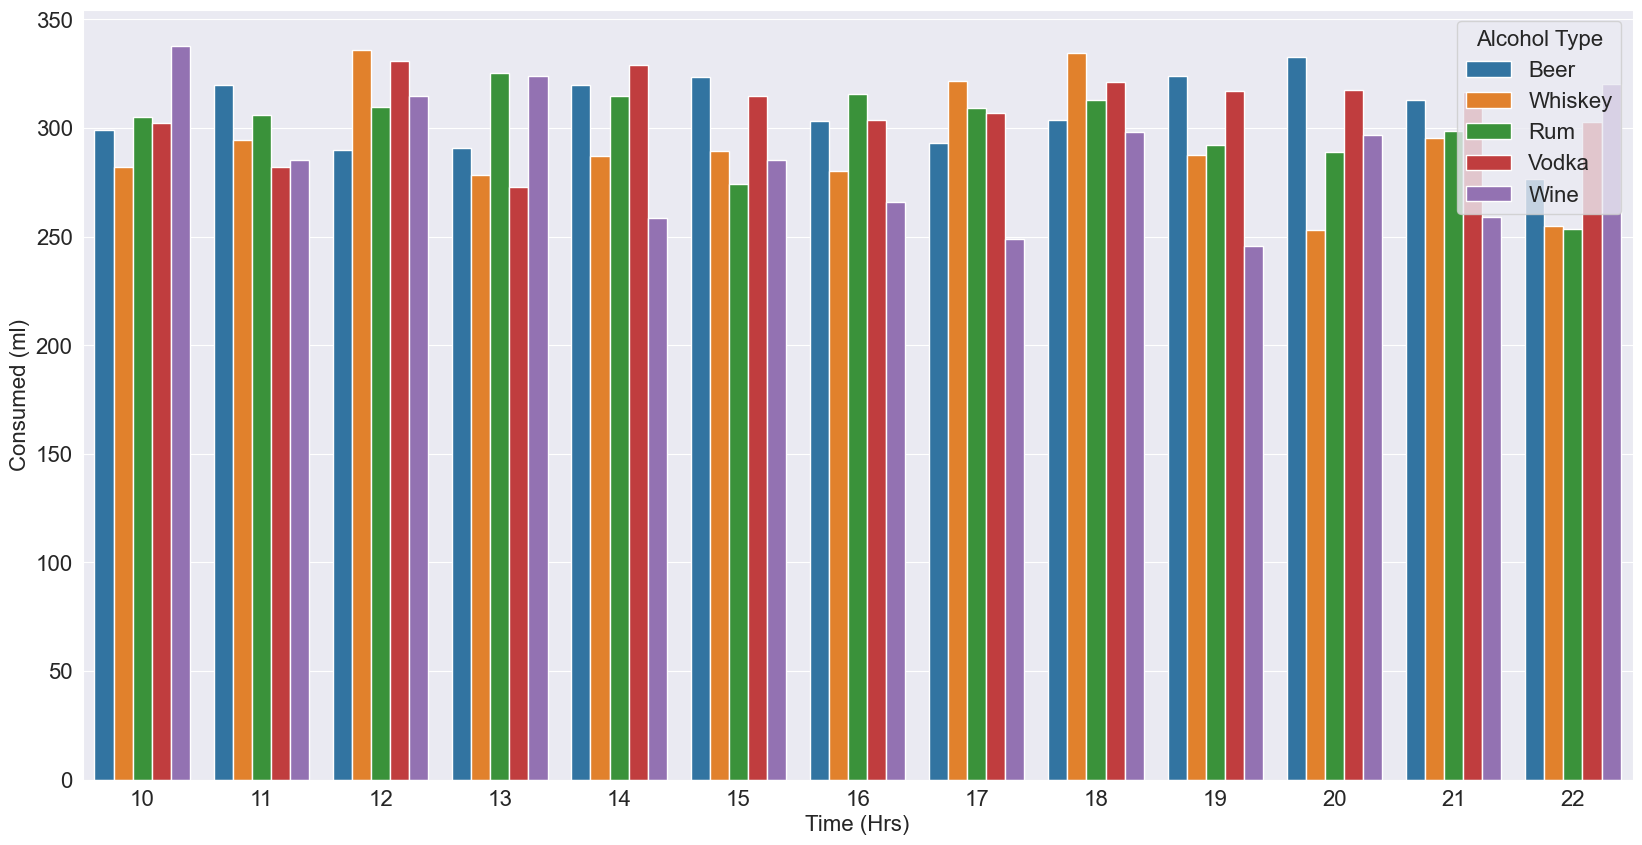

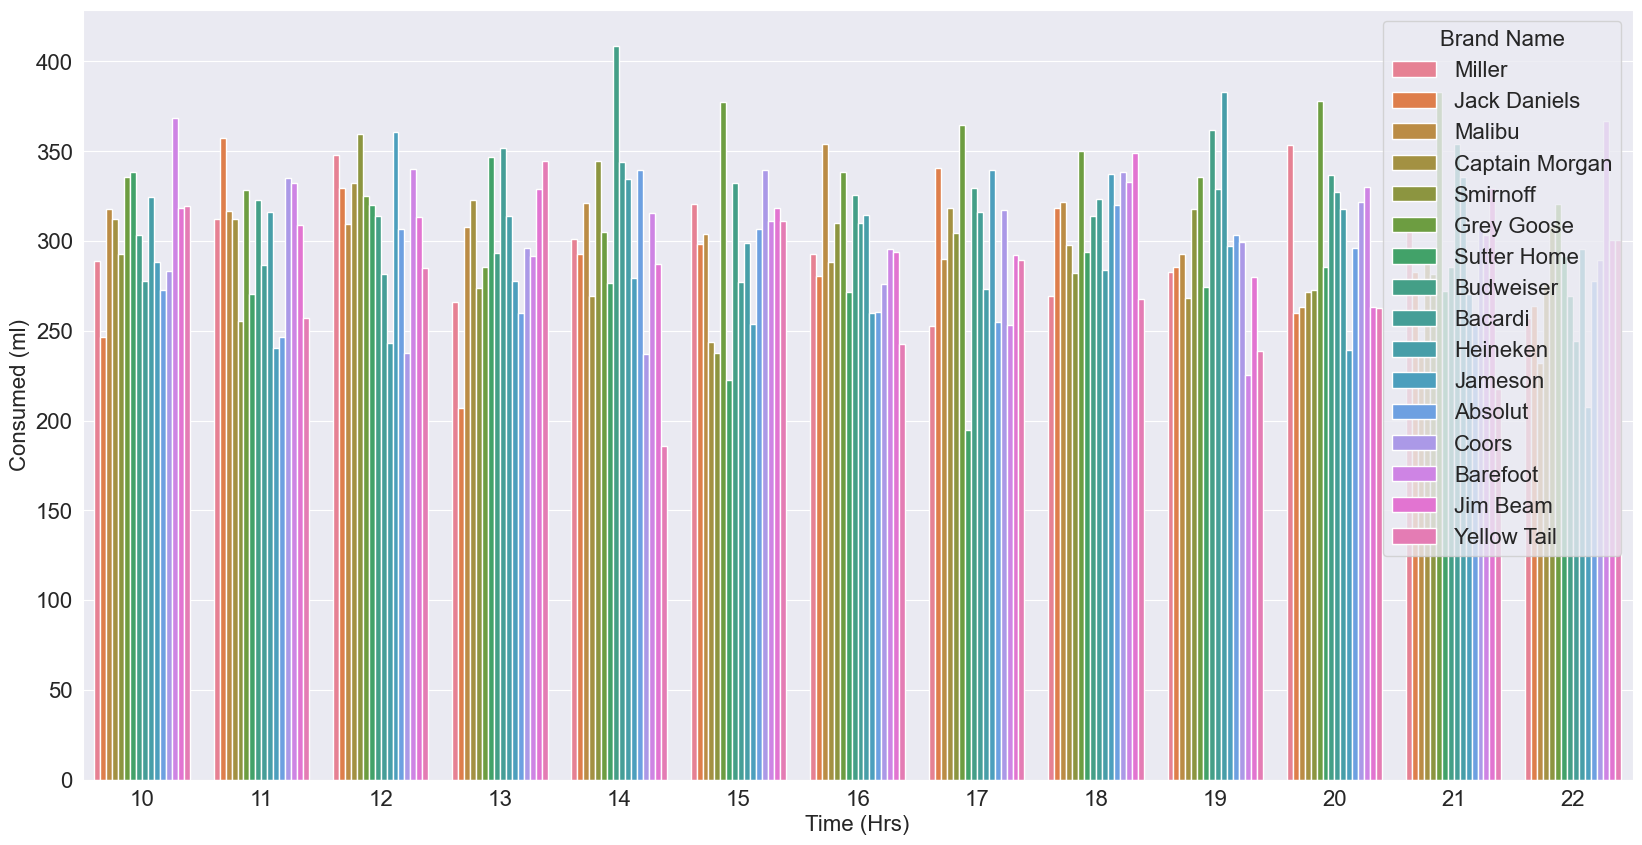

In [27]:
dateandtime = df['Date Time Served'].to_numpy()
timeHour = [s[-5:-3].strip() for s in dateandtime] #Seperating Date from Date and Time
timeMin = [s[-2:].strip() for s in dateandtime] #Seperating Time in Mins from Date and Time
dateRed = [s[:-6].strip() for s in dateandtime] #Seperating Time in Hours from Date and Time

# print(timeMin)

# dateDay = [s[:2].strip() for s in dateRed]
# dateMonth = [s[-7:-5].strip() for s in dateRed]
# dateYear = [s[-4:].strip() for s in dateRed]
# print(dateDay)
# print(dateMonth)
# print(dateYear)
#
dfDateTime = df.copy()
dfDateTime = dfDateTime.drop(columns=['Date Time Served']) #Removing the coloumnd of 'Date and Time Served'
dfDateTime['Date'] = dateRed #Replacing that with Date
dfDateTime['Time (Hrs)'] = timeHour #Replacing that with Time in hours
dfDateTime['Time (Min)'] = timeMin #Replacing that with Time in mins

dfTimeSort = dfDateTime.sort_values(by=['Time (Hrs)', 'Time (Min)'])
# dfTimeSort
# # dfDate = dfDateTime.drop(columns=['Time']).copy()
# # dfDate
# # dfTime = dfDateTime.drop(columns=['Date']).sort_values(["Time"]).copy()
# # figOverallWithDate = px.histogram(dfDate, x='Date', y='Purchase (ml)', color='Bar Name', color_discrete_sequence=px.colors.qualitative.G10, title = "Overall to the Date")
#

arrayPurCons = ['Purchase (ml)', 'Consumed (ml)']
arrayBarAlcBrand = ['Bar Name', 'Alcohol Type', 'Brand Name']

for val_a in arrayPurCons:
    for val_b in arrayBarAlcBrand:
        plt.figure()
        figBarPlt = sns.barplot(dfTimeSort, x='Time (Hrs)', y=f'{val_a}', hue=f'{val_b}', errorbar=None)




#### Below differentiates the Dataset with respect to the Bars, for internal analysis of each bar

In [28]:

dfAnderson = df[df['Bar Name'].str.contains("Anderson")].sort_values(["Alcohol Type", "Brand Name"], ascending=True).copy()
dfBrown = df[df['Bar Name'].str.contains("Brown")].sort_values(["Alcohol Type", "Brand Name"], ascending=True).copy()
dfJohnson = df[df['Bar Name'].str.contains("Johnson")].sort_values(["Alcohol Type", "Brand Name"], ascending=True).copy()
dfSmith = df[df['Bar Name'].str.contains("Smith")].sort_values(["Alcohol Type", "Brand Name"], ascending=True).copy()
dfTaylor = df[df['Bar Name'].str.contains("Taylor")].sort_values(["Alcohol Type", "Brand Name"], ascending=True).copy()
dfThomas = df[df['Bar Name'].str.contains("Thomas")].sort_values(["Alcohol Type", "Brand Name"], ascending=True).copy()



#### This cell below is crucial for data analysis as it maps all the different unqiue bars, alcohol varities and their brands, to numbers. This allows in using Correlation to better understand if any relation is present between the quantities. This can also help in finding if a trend can be spotted and this trend can then be worked on upon.


In [29]:

barName = {"Anderson's Bar":0,"Brown's Bar":1,"Johnson's Bar":2,"Smith's Bar":3,"Taylor's Bar":4,"Thomas's Bar":5}
alcoholType = {'Beer':0,'Rum':1,'Vodka':2,'Whiskey':3,'Wine':4}
brandName = {'Budweiser':0, 'Coors':1, 'Heineken':2, 'Miller':3, 'Bacardi':4, 'Captain Morgan':5,
 'Malibu':6, 'Absolut':7, 'Grey Goose':8, 'Smirnoff':9, 'Jack Daniels':10, 'Jameson':11, 'Jim Beam':12,
 'Barefoot':13, 'Yellow Tail':14}

dfNumeric = df.copy()
dfNumeric = dfNumeric.drop(columns=['Bar Name', 'Alcohol Type', 'Brand Name', 'Date Time Served'])
barName_numeric = df["Bar Name"].map(barName)
alcoholType_numeric = df["Alcohol Type"].map(alcoholType)
brandName_numeric = df["Brand Name"].map(brandName)


dfNumeric['BarNumeric']= barName_numeric
dfNumeric['AlcoholNumeric'] = alcoholType_numeric
dfNumeric['BrandNumeric']= brandName_numeric
dfNumeric


Opening Balance (ml)  Purchase (ml)  Consumed (ml)  \
0             2.555040e+03        1824.84           0.00   
1             1.344370e+03           0.00           0.00   
2             1.034280e+03           0.00           0.00   
3             2.194530e+03           0.00           0.00   
4             1.020900e+03           0.00           0.00   
...                    ...            ...            ...   
6570          2.467080e+03           0.00         321.06   
6571          8.530000e-14        1743.64         175.05   
6572          4.192660e+03           0.00         197.60   
6573          2.424950e+03           0.00         128.52   
6574          1.778360e+03        1195.45         572.60   

      Closing Balance (ml)  BarNumeric  AlcoholNumeric  BrandNumeric  
0                  4379.88           3               1           5.0  
1                  1344.37           3               4          14.0  
2                  1034.28           2               2           8.0  
3                  2194.53           2               0           1.0  
4                  1020.90           2               4          14.0  
...                    ...         ...             ...           ...  
6570               2146.02           0               0           1.0  
6571               1568.59           0               1           6.0  
6572               3995.06           0               3          10.0  
6573               2296.43           5               2           7.0  
6574               2401.21           5               1           4.0  

[6575 rows x 7 columns]

In [30]:
dfNumeric.corr() # .corr() is used to find correlation overall between quantites, this can be verified as equal columns have correlation of 1, resembling they are duplicates

Opening Balance (ml)  Purchase (ml)  Consumed (ml)  \
Opening Balance (ml)              1.000000      -0.015837       0.258866   
Purchase (ml)                    -0.015837       1.000000       0.111480   
Consumed (ml)                     0.258866       0.111480       1.000000   
Closing Balance (ml)              0.966686       0.227826       0.201699   
BarNumeric                       -0.083647      -0.002936      -0.026739   
AlcoholNumeric                    0.110881       0.000823      -0.033068   
BrandNumeric                      0.072762       0.000337      -0.029725   

                      Closing Balance (ml)  BarNumeric  AlcoholNumeric  \
Opening Balance (ml)              0.966686   -0.083647        0.110881   
Purchase (ml)                     0.227826   -0.002936        0.000823   
Consumed (ml)                     0.201699   -0.026739       -0.033068   
Closing Balance (ml)              1.000000   -0.081517        0.112988   
BarNumeric                       -0.081517    1.000000       -0.000115   
AlcoholNumeric                    0.112988   -0.000115        1.000000   
BrandNumeric                      0.074799    0.001762        0.977702   

                      BrandNumeric  
Opening Balance (ml)      0.072762  
Purchase (ml)             0.000337  
Consumed (ml)            -0.029725  
Closing Balance (ml)      0.074799  
BarNumeric                0.001762  
AlcoholNumeric            0.977702  
BrandNumeric              1.000000

#### To make an overall analysis as to how the Bars contribute to the overall alcohol quantity, we define a new database for checking trends of each bar, alcohols and brands.


In [31]:
dfOverall = df.copy().drop(columns=['Date Time Served']).sort_values(by=['Bar Name', 'Alcohol Type', 'Brand Name'], ascending=True)
dfOverall

Bar Name Alcohol Type   Brand Name  Opening Balance (ml)  \
170   Anderson's Bar         Beer    Budweiser               2312.98   
351   Anderson's Bar         Beer    Budweiser               2153.91   
407   Anderson's Bar         Beer    Budweiser               1915.70   
556   Anderson's Bar         Beer    Budweiser               1612.20   
626   Anderson's Bar         Beer    Budweiser               1373.91   
...              ...          ...          ...                   ...   
6168    Thomas's Bar         Wine  Yellow Tail               2507.65   
6239    Thomas's Bar         Wine  Yellow Tail               1978.75   
6262    Thomas's Bar         Wine  Yellow Tail               1664.23   
6417    Thomas's Bar         Wine  Yellow Tail               1472.24   
6475    Thomas's Bar         Wine  Yellow Tail               1106.31   

      Purchase (ml)  Consumed (ml)  Closing Balance (ml)  
170            0.00         159.07               2153.91  
351            0.00         238.21               1915.70  
407            0.00         303.50               1612.20  
556            0.00         238.29               1373.91  
626         1232.67         225.56               2381.02  
...             ...            ...                   ...  
6168           0.00         528.90               1978.75  
6239           0.00         314.52               1664.23  
6262           0.00         191.99               1472.24  
6417           0.00         365.93               1106.31  
6475        1882.22         599.06               2389.47  

[6575 rows x 7 columns]

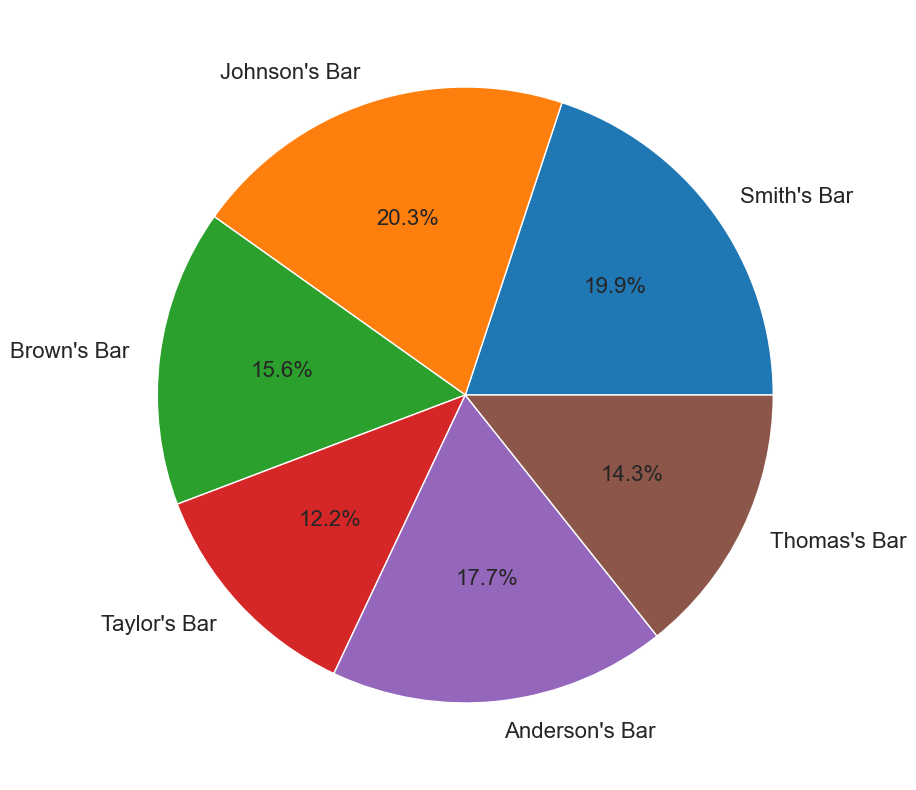

In [62]:

PieOverallBarClose1 = px.pie(dfOverall, values='Opening Balance (ml)', template='plotly_dark', names='Bar Name')
sumOpen = {}
for val in uniqueBars:
    dfTemp = dfOverall[dfOverall['Bar Name'] == f'{val}']
    sumOpen.update({f'{val}':dfTemp['Opening Balance (ml)'].sum()})
PieOverallBarClose = plt.pie(sumOpen.values(),  labels=sumOpen.keys(), autopct='%1.1f%%')
# PieOverallBarClose = px.pie(dfOverall, values='Closing Balance (ml)', template='plotly_dark', names='Bar Name')
# PieOverallBarPur = px.pie(dfOverall, values='Purchase (ml)', template='plotly_dark', names='Bar Name')
# PieOverallBarCons = px.pie(dfOverall, values='Consumed (ml)', template='plotly_dark', names='Bar Name')
# PieOverallAlPur = px.pie(dfOverall, values='Purchase (ml)', template='plotly_dark', names='Alcohol Type')
# PieOverallAlCons = px.pie(dfOverall, values='Consumed (ml)', template='plotly_dark', names='Alcohol Type')
#
# PieOverallBarClose1.show()
# PieOverallBarPur.show()
# PieOverallBarCons.show()
# PieOverallAlPur.show()
# PieOverallAlCons.show()

#### The below cell makes scatter plots of overall all Bars contribution to the Purchase (ml) vs Closing  Balance (ml). After that we comparison the Consumed (ml) to the Closing Balance (ml).
We do this as spot any trends and it is visual that Consumed (ml) has no contribution to the Closing Balance (ml) while Purchase (ml) has a positive LINEAR REGRESSION. This means that people often buy more than consume the alcohol and that contributes more to the Closing Balance.

In [33]:
figOverallBarPur = px.scatter(dfOverall, x='Purchase (ml)', y='Closing Balance (ml)', color = 'Bar Name',
                     color_discrete_sequence=px.colors.qualitative.G10, template='plotly_dark', title='Overall\'s - Bar to Closing')
figOverallAlcoholPur = px.scatter(dfOverall, x='Purchase (ml)', y='Closing Balance (ml)', color = 'Alcohol Type',
                     color_discrete_sequence=px.colors.qualitative.G10, template='plotly_dark', title='Overall\'s - Alcohol to Closing')
figOverallBrandPur = px.scatter(dfOverall, x='Purchase (ml)', y='Closing Balance (ml)', color = 'Brand Name',
                     color_discrete_sequence=px.colors.qualitative.G10, template='plotly_dark', title='Overall\'s - Brand to Closing')

figOverallBarCons = px.scatter(dfOverall, x='Consumed (ml)', y='Closing Balance (ml)', color='Bar Name',
                                color_discrete_sequence=px.colors.qualitative.G10, template='plotly_dark', title='Overall\'s - Bar to Closing')
figOverallAlcoholCons = px.scatter(dfOverall, x='Consumed (ml)', y='Closing Balance (ml)', color='Alcohol Type',
                                  color_discrete_sequence=px.colors.qualitative.G10,
                                template='plotly_dark', title='Overall\'s - Alcohol to Closing')
figOverallBrandCons = px.scatter(dfOverall, x='Consumed (ml)', y='Closing Balance (ml)', color='Brand Name',
                                color_discrete_sequence=px.colors.qualitative.G10,
                                template='plotly_dark', title='Overall\'s - Brand to Closing')

figOverallBarPur.show()
figOverallAlcoholPur.show()
figOverallBrandPur.show()

figOverallBarCons.show()
figOverallAlcoholCons.show()
figOverallBrandCons.show()

#### This cell has been commented as it shows a Pie diagram for each representation of each bar with trends in Brand and Alcohol, and can be visually seen in the next upcoming cells and so kept commented. Feel free to uncomment and visualize them.


In [34]:
# PieAndyBrandPur = px.pie(dfAnderson, values='Purchase (ml)', names='Brand Name')
# PieAndyAlcoholPur = px.pie(dfAnderson, values='Purchase (ml)', names='Alcohol Type')
# PieBrownBrandPur = px.pie(dfBrown, values='Purchase (ml)', names='Brand Name')
# PieBrownAlcoholPur = px.pie(dfBrown, values='Purchase (ml)', names='Alcohol Type')
# PieJohnsonBrandPur = px.pie(dfJohnson, values='Purchase (ml)', names='Brand Name')
# PieJohnsonAlcoholPur = px.pie(dfJohnson, values='Purchase (ml)', names='Alcohol Type')
# PieSmithBrandPur = px.pie(dfSmith, values='Purchase (ml)', names='Brand Name')
# PieSmithAlcoholPur = px.pie(dfSmith, values='Purchase (ml)', names='Alcohol Type')
# PieTaylorBrandPur = px.pie(dfTaylor, values='Purchase (ml)', names='Brand Name')
# PieTaylorAlcoholPur = px.pie(dfTaylor, values='Purchase (ml)', names='Alcohol Type')
# PieThomasBrandPur = px.pie(dfThomas, values='Purchase (ml)', names='Brand Name')
# PieThomasAlcoholPur = px.pie(dfThomas, values='Purchase (ml)', names='Alcohol Type')
#
#
# PieAndyAlcoholPur.show()
# PieBrownAlcoholPur.show()
# PieJohnsonAlcoholPur.show()
# PieSmithAlcoholPur.show()
# PieTaylorAlcoholPur.show()
# PieThomasAlcoholPur.show()
# PieAndyBrandPur.show()
# PieBrownBrandPur.show()
# PieJohnsonBrandPur.show()
# PieSmithBrandPur.show()
# PieTaylorBrandPur.show()
# PieThomasBrandPur.show()

#### The following cell is used for analysis of the overall usage of inventory for each trending alchools for each bar with their brands as well. It also mentions that overall which alcohol brand is conusmed more and which isn't and can be kept less in quantity.

In [35]:

figOverallDifferenceAl = px.histogram(dfOverall, x=dfOverall.columns[:1], y='Purchase (ml)', barmode='group', marginal='rug', color = 'Alcohol Type',color_discrete_sequence=px.colors.qualitative.G10, template='plotly_dark', title='Brands').update_layout(bargap=0.2)
figOverallDifferenceBrNa = px.histogram(dfOverall, x=dfOverall.columns[:1], y='Purchase (ml)', barmode='group', marginal='rug', color = 'Brand Name',color_discrete_sequence=px.colors.qualitative.G10, template='plotly_dark', title='Brands').update_layout(bargap=0.2)

figOverallDifferenceAl.show()
figOverallDifferenceBrNa.show()

#### The below cell gives a detailed anlaysis for each bars inventory as well as what drink is purchased more and what is consumed more, as well as gives a analysis as to which inventory shall be kept in high quantites while which shouldn't.

In [36]:
figAndersonAlBrPur = px.histogram(dfAnderson, x=dfAnderson.columns[2:3], y='Purchase (ml)', barmode='group', marginal='rug', color = 'Brand Name',color_discrete_sequence=px.colors.qualitative.G10, template='plotly_dark', title='Anderson\'s Bar Alcohol to Purchase (ml) (Brand Name)')
figAndersonAlBrCons = px.histogram(dfAnderson, x=dfAnderson.columns[2:3], y='Consumed (ml)', barmode='group', marginal='rug', color = 'Brand Name',color_discrete_sequence=px.colors.qualitative.G10, template='plotly_dark', title='Anderson\'s Bar Alcohol to Consumed (ml) (Brand Name)')


figBrownAlBrPur = px.histogram(dfBrown, x=dfBrown.columns[2:3], y='Purchase (ml)', barmode='group', marginal='rug', color = 'Brand Name',color_discrete_sequence=px.colors.qualitative.G10, template='plotly_dark', title='Brown\'s Bar Alcohol to Purchase (ml) (Brand Name)')
figBrownAlBrCons = px.histogram(dfBrown, x=dfBrown.columns[2:3], y='Consumed (ml)', barmode='group', marginal='rug', color = 'Brand Name',color_discrete_sequence=px.colors.qualitative.G10, template='plotly_dark', title='Brown\'s Bar Alcohol to Consumed (ml) (Consumed (ml))')

figJohnsonAlBrPur = px.histogram(dfJohnson, x=dfJohnson.columns[2:3], y='Purchase (ml)', barmode='group', marginal='rug', color = 'Brand Name',color_discrete_sequence=px.colors.qualitative.G10, template='plotly_dark', title='Johnson\'s Bar Alcohol to Purchase (ml) (Brand Name)')
figJohnsonAlBrCons = px.histogram(dfJohnson, x=dfJohnson.columns[2:3], y='Consumed (ml)', barmode='group', marginal='rug', color = 'Brand Name',color_discrete_sequence=px.colors.qualitative.G10, template='plotly_dark', title='Johnson\'s Bar Alcohol to Consumed (ml) (Consumed (ml))')

figSmithAlBrPur = px.histogram(dfSmith, x=dfSmith.columns[2:3], y='Purchase (ml)', barmode='group', marginal='rug', color = 'Brand Name',color_discrete_sequence=px.colors.qualitative.G10, template='plotly_dark', title='Smith\'s Bar Alcohol to Purchase (ml) (Brand Name)')
figSmithAlBrCons = px.histogram(dfSmith, x=dfSmith.columns[2:3], y='Purchase (ml)', barmode='group', marginal='rug', color = 'Brand Name',color_discrete_sequence=px.colors.qualitative.G10, template='plotly_dark', title='Smith\'s Bar Alcohol to Consumed (ml) (Consumed (ml))')

figTaylorAlBrPur = px.histogram(dfTaylor, x=dfTaylor.columns[2:3], y='Purchase (ml)', barmode='group', marginal='rug', color = 'Brand Name',color_discrete_sequence=px.colors.qualitative.G10, template='plotly_dark', title='Taylor\'s Bar Alcohol to Purchase (ml) (Brand Name)')
figTaylorAlBrCons = px.histogram(dfTaylor, x=dfTaylor.columns[2:3], y='Consumed (ml)', barmode='group', marginal='rug', color = 'Brand Name',color_discrete_sequence=px.colors.qualitative.G10, template='plotly_dark', title='Taylor\'s Bar Alcohol to Consumed (ml) (Consumed (ml))')

figThomasAlBrPur = px.histogram(dfThomas, x=dfThomas.columns[2:3], y='Purchase (ml)', barmode='group', marginal='rug', color = 'Brand Name',color_discrete_sequence=px.colors.qualitative.G10, template='plotly_dark', title='Thomas\'s Bar Alcohol to Purchase (ml) (Brand Name)')
figThomasAlBrCons = px.histogram(dfThomas, x=dfThomas.columns[2:3], y='Consumed (ml)', barmode='group', marginal='rug', color = 'Brand Name',color_discrete_sequence=px.colors.qualitative.G10, template='plotly_dark', title='Thomas\'s Bar Alcohol to Consumed (ml) (Consumed (ml))')

figAndersonAlBrPur.show()
figBrownAlBrPur.show()
figJohnsonAlBrPur.show()
figSmithAlBrPur.show()
figTaylorAlBrPur.show()
figThomasAlBrPur.show()

print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

figAndersonAlBrCons.show()
figBrownAlBrCons.show()
figJohnsonAlBrCons.show()
figSmithAlBrCons.show()
figTaylorAlBrCons.show()
figThomasAlBrCons.show()


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


#### The below cell makes scatter plots for different bars with their EACH contribution to the Purchase (ml) vs Closing  Balance (ml). After that we comparison the Consumed (ml) to the Closing Balance (ml).
We do this as spotted above that Purchase has a positive LINEAR REGRESSION with Closing Balance and as we proceed we spot that though all have an erratic nature, Taylor's Bar shows progress over time.

In [37]:
""
figAndyBrPur = px.histogram(dfAnderson, x='Brand Name', y='Purchase (ml)', marginal='box', color = 'Brand Name',
                            color_discrete_sequence=px.colors.qualitative.G10, template='plotly_dark', title='Brands').update_layout(bargap=0.1)
figBrownBrPur = px.histogram(dfBrown, x='Brand Name', y='Purchase (ml)', marginal='box', color = 'Brand Name',
                            color_discrete_sequence=px.colors.qualitative.G10, template='plotly_dark', title='Brands').update_layout(bargap=0.1)
figSmithBrPur = px.histogram(dfSmith, x=dfSmith.columns[2:4], y='Purchase (ml)', barmode='group', marginal='rug', color = 'Brand Name',color_discrete_sequence=px.colors.qualitative.G10, title='Brands').update_layout(bargap=0.1)
figSmithBrPur2 = px.histogram(dfSmith, x='Brand Name', y='Purchase (ml)', marginal='box', color = 'Brand Name',
                            color_discrete_sequence=px.colors.qualitative.G10, template='plotly_dark', title='Brands').update_layout(bargap=0.1)

figTayBrPur = px.histogram(dfTaylor, x='Brand Name', y='Purchase (ml)', marginal='box', color = 'Brand Name',
                            color_discrete_sequence=px.colors.qualitative.G10, template='plotly_dark', title='Brands').update_layout(bargap=0.1)
figThomBrPur = px.histogram(dfThomas, x='Brand Name', y='Purchase (ml)', marginal='box', color = 'Brand Name',
                            color_discrete_sequence=px.colors.qualitative.G10, template='plotly_dark', title='Brands').update_layout(bargap=0.1)

figAndyPurClose = px.scatter(dfAnderson, x='Purchase (ml)', y='Closing Balance (ml)', color = 'Alcohol Type',
                     color_discrete_sequence=px.colors.qualitative.G10, template='plotly_dark', title='Anderson\'s - Purchase To Closing Balance')
figBrownPurClose = px.scatter(dfBrown, x='Purchase (ml)', y='Closing Balance (ml)', color = 'Alcohol Type',
                     color_discrete_sequence=px.colors.qualitative.G10, template='plotly_dark', title='Brown\'s - Purchase To Closing Balance')
figJohnsonPurClose = px.scatter(dfJohnson, x='Purchase (ml)', y='Closing Balance (ml)', color = 'Alcohol Type',
                     color_discrete_sequence=px.colors.qualitative.G10, template='plotly_dark', title='Smith\'s - Purchase To Closing Balance')
figSmithPurClose = px.scatter(dfSmith, x='Purchase (ml)', y='Closing Balance (ml)', color = 'Alcohol Type',
                     color_discrete_sequence=px.colors.qualitative.G10, template='plotly_dark', title='Smith\'s - Purchase To Closing Balance')
figTayPurClose = px.scatter(dfTaylor, x='Purchase (ml)', y='Closing Balance (ml)', color = 'Alcohol Type',
                     color_discrete_sequence=px.colors.qualitative.G10, template='plotly_dark', title='Taylor\'s - Purchase To Closing Balance')
figThomasPurClose = px.scatter(dfThomas, x='Purchase (ml)', y='Closing Balance (ml)', color = 'Alcohol Type',
                     color_discrete_sequence=px.colors.qualitative.G10, template='plotly_dark', title='Thomas\'s - Purchase To Closing Balance')


# figAndyBrPur.show()
# figBrownBrPur.show()
# figSmithBrPur.show()
# figSmithBrPur2.show()
# figTayBrPur.show()
# figThomBrPur.show()
print("=================================================================================================================")
figAndyPurClose.show()
figBrownPurClose.show()
figJohnsonPurClose.show()
figSmithPurClose.show()
figTayPurClose.show()
figThomasPurClose.show()


#### For better visualization of the above graphs, the below cell gives a relation with pruchase of brand and alcohol types without consideration of segregating them but the have been sorted and can be understood with above graphs as to which brand belongs to which alcohol.

In [38]:
figAndyBrCons = px.histogram(dfAnderson,
                     x='Brand Name',
                     y='Consumed (ml)',
                     marginal='box',
                     color = 'Brand Name',
                     color_discrete_sequence=px.colors.qualitative.G10,
                     title='Anderson\'s Bar - Brand to Consumed (ml)').update_layout(bargap=0.1)
figBrownBrCons = px.histogram(dfBrown, x='Brand Name', y='Consumed (ml)', marginal='box',
                     color = 'Brand Name', color_discrete_sequence=px.colors.qualitative.G10, template='plotly_dark', title='Brown\'s Bar - Brand to Consumed (ml)').update_layout(bargap=0.1)
figSmithBrCons = px.histogram(dfSmith, x='Brand Name', y='Consumed (ml)', marginal='box',
                     color = 'Brand Name', color_discrete_sequence=px.colors.qualitative.G10, template='plotly_dark', title='Smith\'s Bar - Brand to Consumed (ml)').update_layout(bargap=0.1)
figJohnsonBrCons = px.histogram(dfJohnson, x='Brand Name', y='Consumed (ml)', marginal='box',
                     color = 'Brand Name', color_discrete_sequence=px.colors.qualitative.G10, template='plotly_dark', title='Johnson\'s Bar - Brand to Consumed (ml)').update_layout(bargap=0.1)
figTayBrCons = px.histogram(dfTaylor, x='Brand Name', y='Consumed (ml)', marginal='box',
                     color = 'Brand Name', color_discrete_sequence=px.colors.qualitative.G10, template='plotly_dark', title='Taylor\'s Bar - Brand to Consumed (ml)').update_layout(bargap=0.1)
figThomasBrCons = px.histogram(dfThomas, x='Brand Name', y='Consumed (ml)', marginal='box',
                     color = 'Brand Name', color_discrete_sequence=px.colors.qualitative.G10, template='plotly_dark', title='Thomas\'s Bar - Brand to Consumed (ml)').update_layout(bargap=0.1)

figAndyBrCons.show()
figBrownBrCons.show()
figSmithBrCons.show()
figJohnsonBrCons.show()
figTayBrCons.show()
figThomasBrCons.show()

#### With this we can conclude that the following things:
1. Purchase is considered a more viable option to Consumption
2. Each bar contributes to the closing balance while Johnson's Bar has the highest contribution of 20.2%, Thomas's Bar has the lowest contribution of 14.3%.
3. The Bars with the highest requirement of inventory for each alcohol by brand name as well as, understanding pattern {Highest Alcohol}: {Highest Brand} over {Lowest Alcohol}:{Highest Brand}; {Rest with their Highest Brand}
4. 1. Andy  - Wine: Barefoot, Whiskey: Jim Beam over Beer: Coors; for Rum:Captain Morgan and for Vodka: Smirnoff
    2. Brown - Beer: Heineken, Vodka: Grey Goose over Rum: Bacardi; for Whiskey: Jameson and for Vodka: Grey Goose
    3. Johnson - Beer: all near to equal except Miller, Vodka: Bacardi and Grey Goose over Whiskey: Jim Beam and Jack Daniel; for Rum: Captain Morgan and Malibu and Wine: Barefoot
    4. Smith - Whiskey: Jim Beam, Vodka: Absolut and Grey Goose over Rum: Malibu; for Beer: Miller and Budweiser and Wine: all equivalently, Yellow Tail highest
    5. Taylor - Beer: Budweiser and Coors, equivalently rest (hence linear regression) over Wine: Barefoot; for Whiskey: all equivalently, Rum(Captain Morgan and VodkaGrey Goose
    6. Thomas - Rum: Miller and Budweiser, Vodka: Grey Goose over Rum(all literally equal; for Whiskey: Jack Daniels and Jim Beam and Wine: Barefoot and Yellow Tail
5. Overall the Consumption has increased over the year as customers plan to Purchase more than Consuming at all the bars!